In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import m_D_plots as plot

In [233]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
    "legend.fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [3]:
'''
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
'''
# LOAD DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open('../instance_files/mD_vT_vars_rand', 'rb')
result_rand = pickle.load(f)
f.close()

f = open('../instance_files/mD_vT_vars_flat', 'rb')
result_flat = pickle.load(f)
f.close()

locals().update(result_flat)

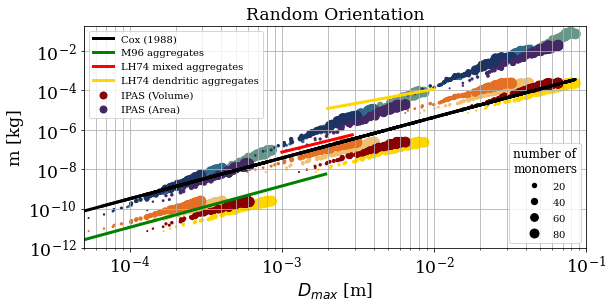

In [45]:
#RANDOM ORIENTATION
#convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0,1,2,3]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());


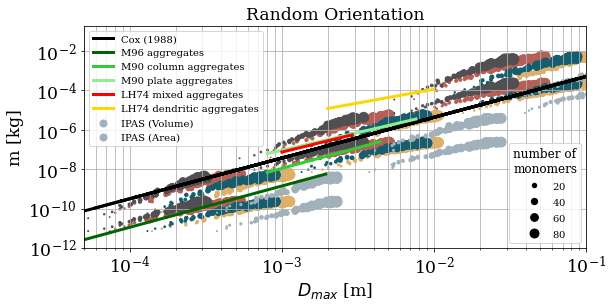

In [150]:
#QH ORIENTATION
#convert dict keys to variables
locals().update(result_flat)

phi_idxs = [0,1,2,3,4]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());


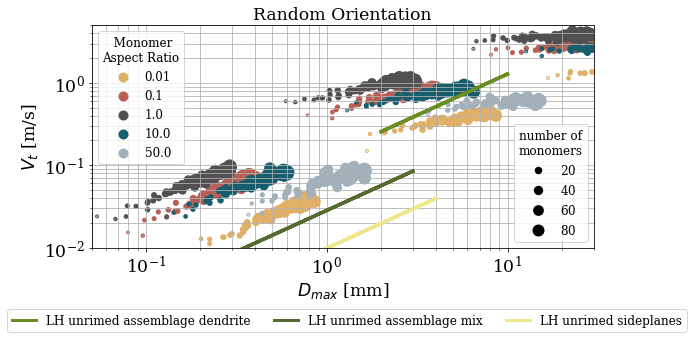

In [238]:
# RANDOM ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.vt_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels[45:], handles[45:]))
leg1 = plt.legend(
    by_label.values(),
    by_label.keys(),
    title="   Monomer\nAspect Ratio",
    loc="upper left",
)
plt.gca().add_artist(leg1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels[:3], handles[:3]))
plt.legend(
    by_label.values(),
    by_label.keys(),
    bbox_to_anchor=(-0.18, -0.45, 0.0, 0.2),
    loc="upper left",
    ncol=3,
);

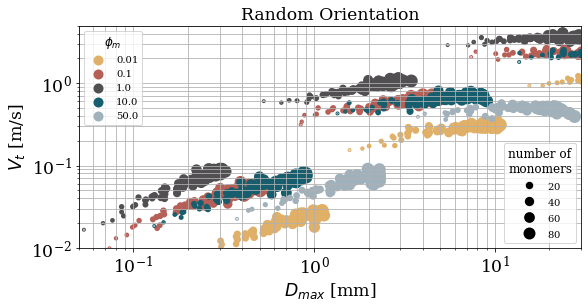

In [151]:
#FLAT ORIENTATION
#convert dict keys to variables
locals().update(result_flat)

phi_idxs = [0,1,2,3,4]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.vt_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='$\phi_m$');
